In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [253]:
df = pd.read_csv(r"C:\Users\compu maarouf\OneDrive\Desktop\nti projects\data sets\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [255]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [256]:
df.duplicated().sum()

np.int64(0)

In [257]:
df.drop(['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis = 1 , inplace = True)

In [258]:
num_col = df.select_dtypes(include="number").columns
num_col

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [259]:
cat_col = df.select_dtypes(exclude="number").columns
cat_col

Index(['Sex', 'Embarked'], dtype='object')

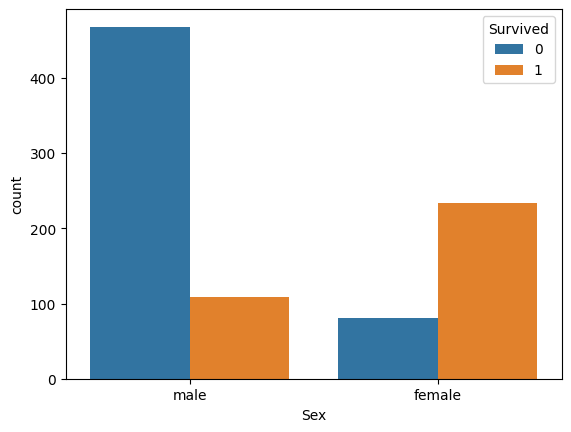

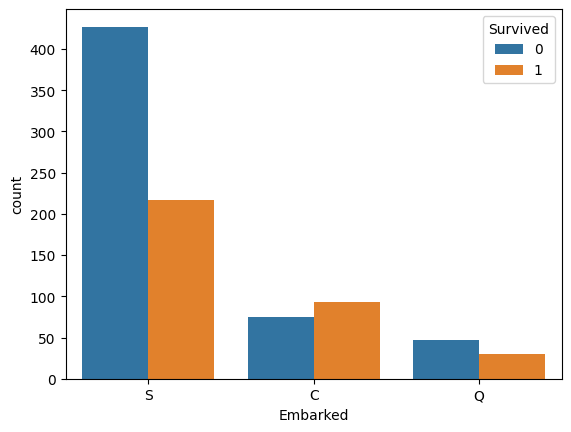

In [260]:
for col in cat_col:
    sns.countplot(x = df[col] , hue='Survived' , data = df)
    plt.show()

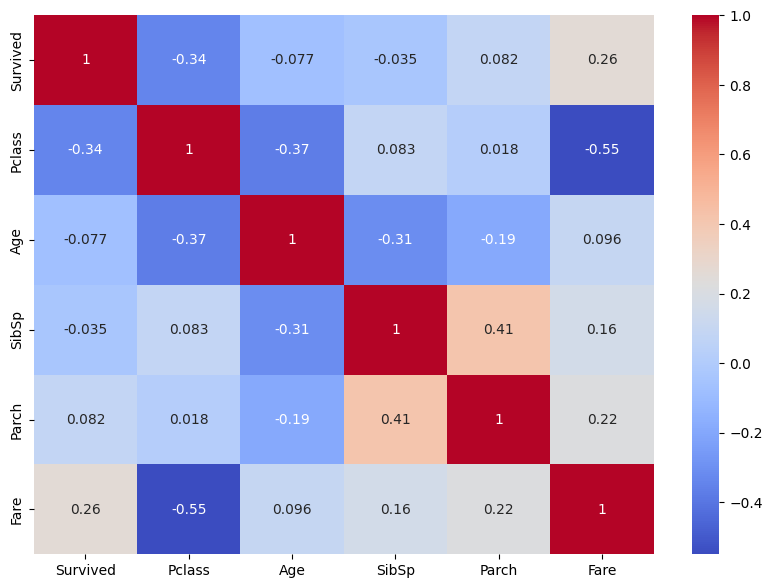

In [261]:
plt.figure(figsize= (10 , 7))
sns.heatmap(df[num_col].corr() , annot=True , cmap="coolwarm" )
plt.show()

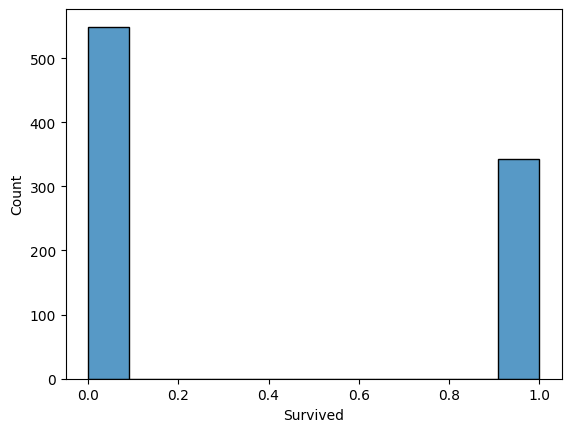

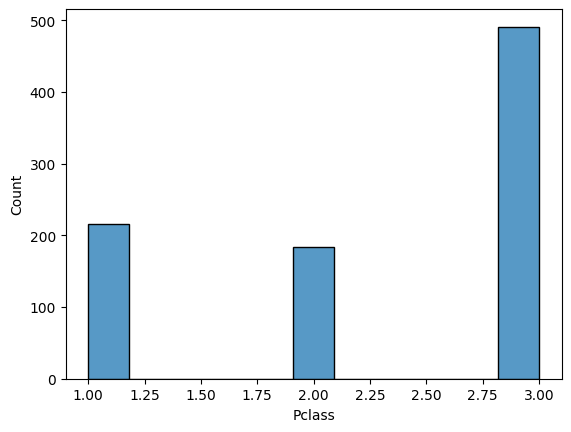

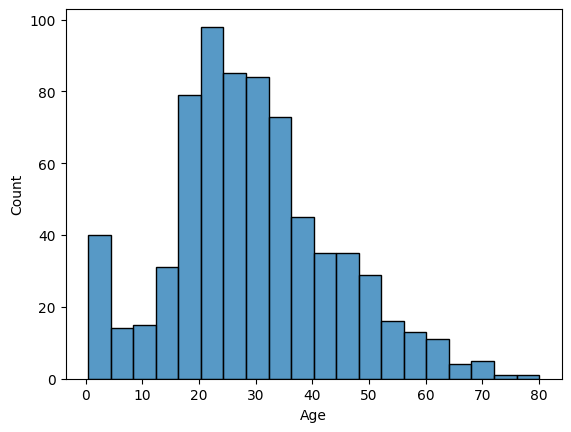

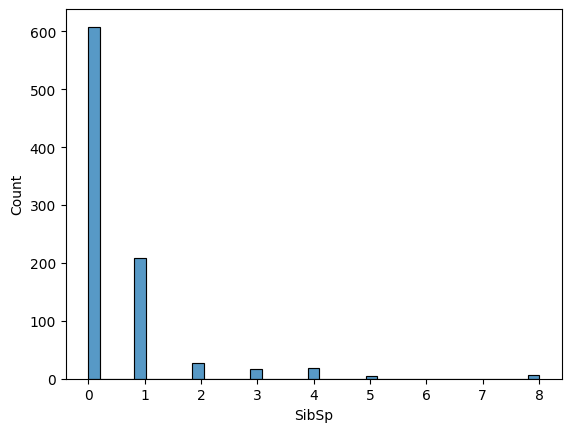

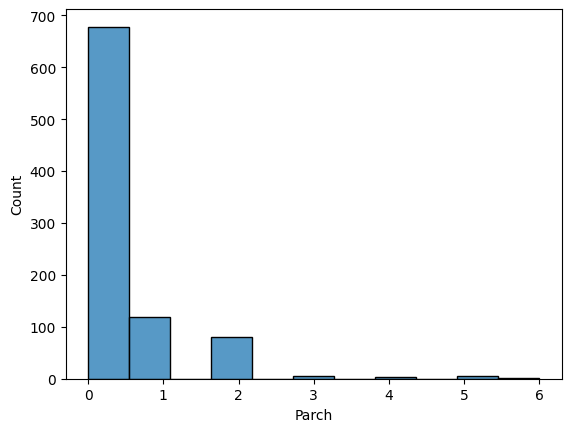

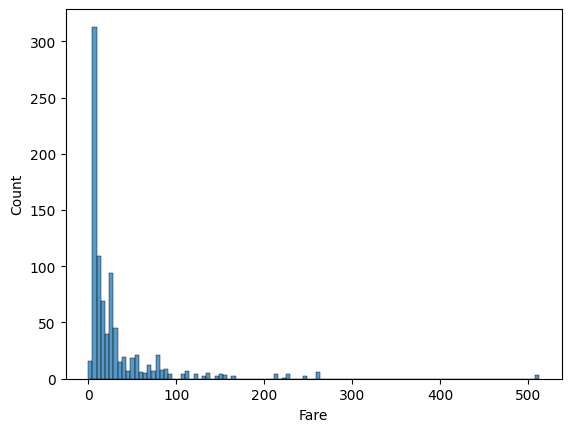

In [262]:
for col in num_col:
    sns.histplot(df[col])
    plt.show()

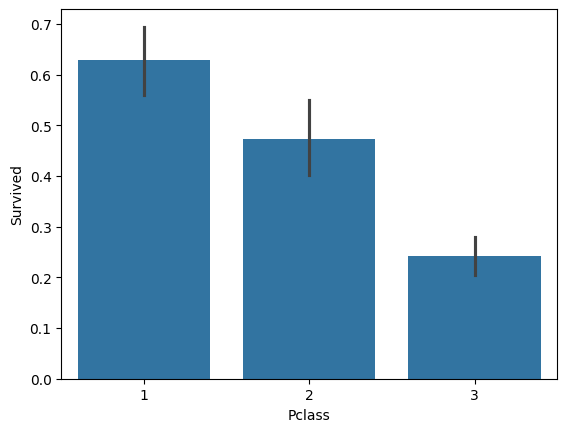

In [263]:
sns.barplot(x = 'Pclass' , y='Survived' , data = df)
plt.show()

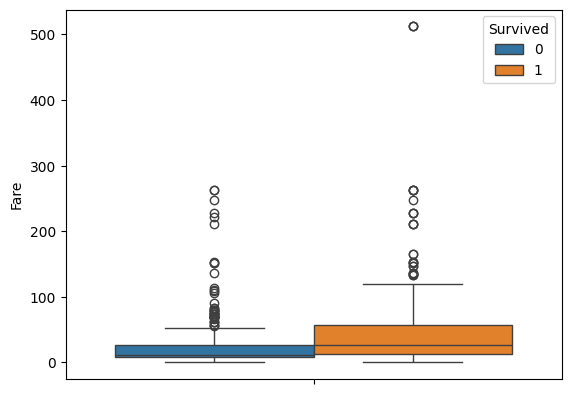

In [264]:

sns.boxplot(y = 'Fare' , hue='Survived' , data = df)
plt.show()

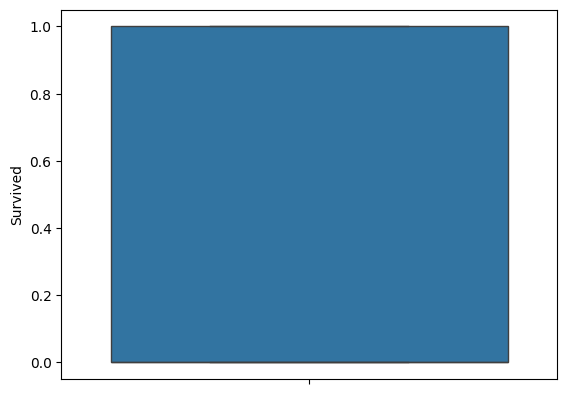

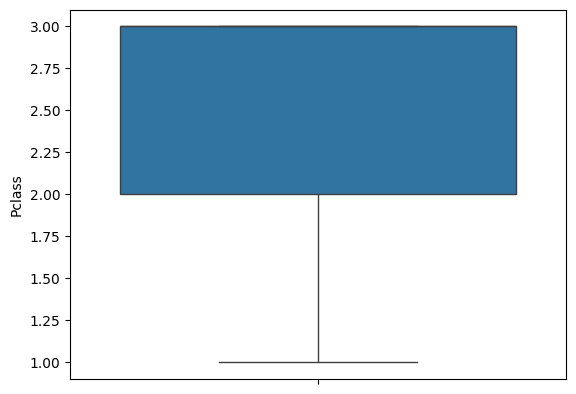

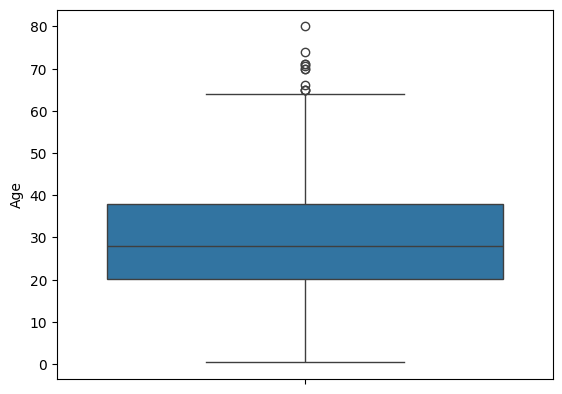

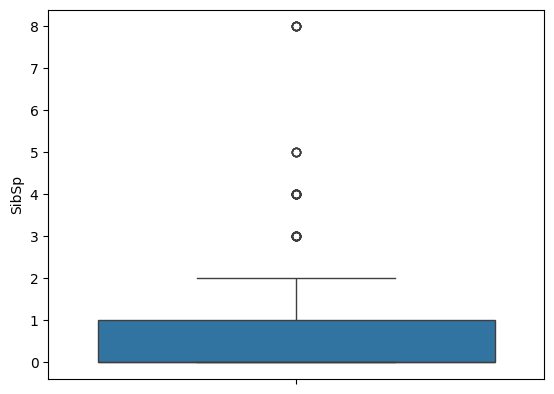

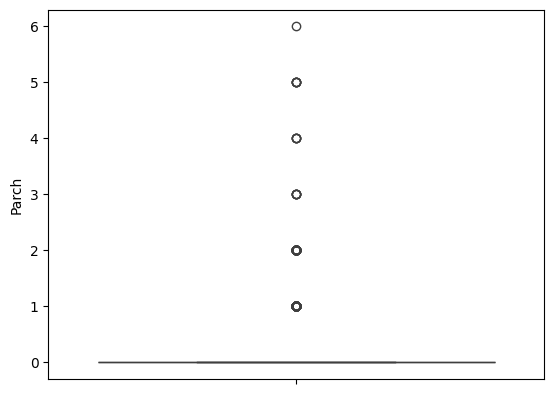

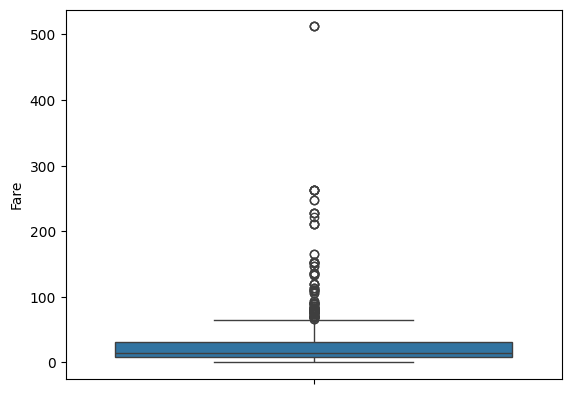

In [265]:
for col in num_col:
    sns.boxplot(df[col])
    plt.show()

In [266]:
for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_item = q3 + 1.5 * iqr
    lower_item = q1 - 1.5 * iqr
    df[col] = df[col].clip(lower = lower_item , upper = upper_item)

In [267]:
avg_value = df.groupby('Survived')['Age'].mean()
avg_value

Survived
0    30.533314
1    28.291319
Name: Age, dtype: float64

In [268]:
df["Age"] = df["Age"].fillna(df.groupby("Survived")["Age"].transform("mean"))

In [269]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [270]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [271]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [272]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1.0,0,7.2500,2
1,1,1,0,38.000000,1.0,0,65.6344,0
2,1,3,0,26.000000,0.0,0,7.9250,2
3,1,1,0,35.000000,1.0,0,53.1000,2
4,0,3,1,35.000000,0.0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.0,0,13.0000,2
887,1,1,0,19.000000,0.0,0,30.0000,2
888,0,3,0,30.533314,1.0,0,23.4500,2
889,1,1,1,26.000000,0.0,0,30.0000,0


In [273]:
cols = ['Age' , 'Fare']

In [274]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived' , axis= 1)
y = df['Survived']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [275]:
scaler = StandardScaler()
x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

In [290]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier( random_state=42 )


param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "min_child_weight": [1, 3, 5]
}


grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",  
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 1.0}

In [291]:
xgb_model = XGBClassifier( colsample_bytree = 0.7 , learning_rate = 0.05 ,
                          max_depth = 3 , min_child_weight = 1 ,
                          n_estimators = 300 , subsample = 1.0)

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [292]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
y_pred = xgb_model.predict(x_test)
print("For XGBoost : ")
print( accuracy_score(y_test, y_pred) )
print( classification_report(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))


For XGBoost : 
0.8491620111731844
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.86      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

[[96  9]
 [18 56]]


In [297]:
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9058988764044944
Test Accuracy: 0.8491620111731844


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier( random_state=42 )


param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "min_child_weight": [1, 3, 5]
}


grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",  
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 1.0}

Train Accuracy: 0.9058988764044944
Test Accuracy: 0.8491620111731844


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)


params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# إعداد GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=5,               
    scoring="accuracy",  
    n_jobs=-1,           
    verbose=2
)

grid_search.fit(x_train, y_train)

grid_search.best_params_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:

RF_model = RandomForestClassifier(n_estimators=200, max_depth=10 ,
                                   min_samples_leaf = 4 , min_samples_split = 2 ,
                                     max_features = 'sqrt' , random_state=42)
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [287]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
y_pred = RF_model.predict(x_test)
print("For Random Forest : ")
print( accuracy_score(y_test, y_pred) )
print( classification_report(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))


For Random Forest : 
0.8603351955307262
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       105
           1       0.89      0.76      0.82        74

    accuracy                           0.86       179
   macro avg       0.87      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179

[[98  7]
 [18 56]]


In [295]:
y_train_pred = RF_model.predict(x_train)
y_test_pred = RF_model.predict(x_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8890449438202247
Test Accuracy: 0.8603351955307262
